In [247]:
# BASİT DOĞRUSAL REGRESYON : TEMEL AMAÇ ,BAĞIMLI VE BAĞIMSIZ DEĞİŞKEN ARASINDAKİ İLİŞKİYİ İFADE EDER
# 
import pandas as pd 
ad=pd.read_csv("Advertising.csv")
df=ad.copy()
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [248]:
df=df.iloc[:,1:len(df)]
df.head()
# burada indexleri değişken olarak almış onu değiştireceğiz

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [250]:
df.describe().T
# 50% = medyan demektir  Reklam harcaması verisidir bu veriler

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [251]:
df.isnull().values.any() # hiç boş değer var mı dedik

False

In [134]:
df.corr() # korelasyon

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


import seaborn as sns
sns.pairplot(df, kind  ="reg");

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


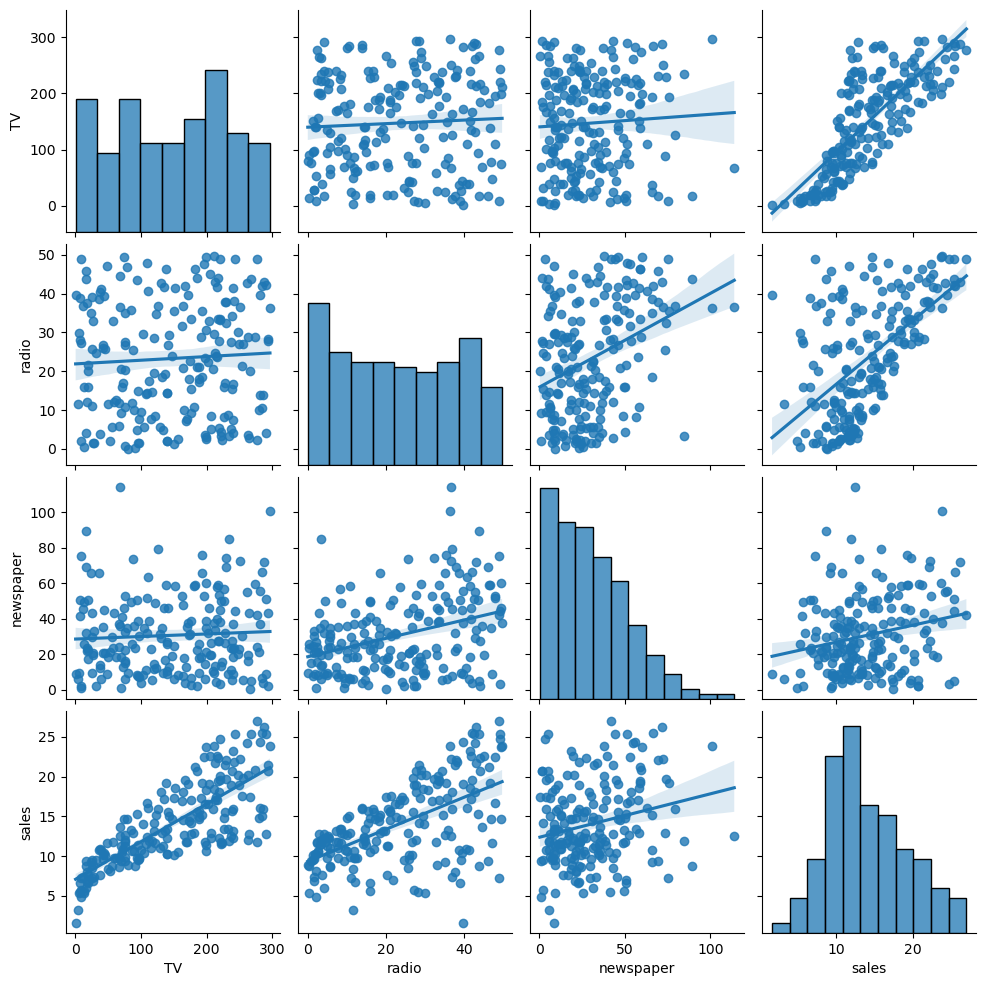

In [253]:
import seaborn as sns
sns.pairplot(df, kind  ="reg"); # burada regresyon gradiğini yazdırdık

In [169]:
 #  grafikleri yorumlamamyı unutma

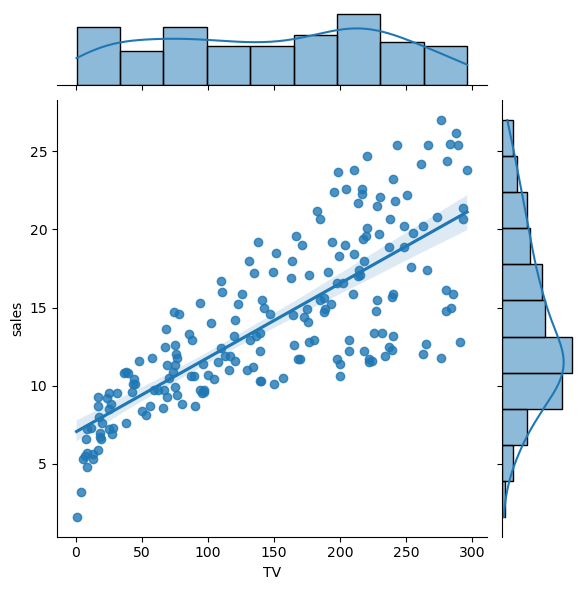

In [254]:
sns.jointplot(x="TV",y="sales",data =df,kind="reg")

In [255]:
import statsmodels.api as sm # stats ile modelleme
X=df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [256]:
X=sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [257]:
y=df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [258]:
lm = sm.OLS(y,X) # lm liner regresyon, y =bağımlı değişken küçük yazılır,x =bağımsız değişkne

In [259]:
model=lm.fit()
model.summary()
#rkare R-squared = bağımsız değişkenin bağımlı değişkendeki değişkrnliği açıklama başarısıdır
# düzeltilmiş r kare değeri daha önemlidir
#f_statistic= p -value değeridir modelin anlamlılığıdır
# aşağıdaki const tv değrlerinin sağ tarafındaki değer güven aralığının değeridir 
# coef std err bunlar bize standart hatasını veriri anlamılı olup olmadığını yaninda t testi yapılmış p-value değeri ise başarılı anlamlı yorumunu yapabiliriz
# const=sabit değer yani satışların verilerin ort değeridir
# altta yazan tv değeri ise bir birim tv artışında satışın ort  artma değeridir
# çok çok önemlidir



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           1.47e-42
Time:                        12:36:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
import statsmodels.formula.api as smf
lm=smf.ols("sales~TV",df) # buda modelin x,y değilde isimle beraber nasıl kullanılır sorusuna cevaben kullanılan modelidir
model =lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           1.47e-42
Time:                        12:36:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [262]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [263]:
model.conf_int() # güven aralığı modelin

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [264]:
model.f_pvalue  #modelin anlamlılığına ilişkin istatistik p-valur değeri

1.467389700194647e-42

In [265]:
print("f_pvalue: ","%.4f"%model.f_pvalue) # anlamılı yazma işlemi

f_pvalue:  0.0000


In [266]:
# değişkenlerin göstrildiği değerler =parametredir

In [267]:
print("tpvalue: ","%.4f"%model.tvalues[0:1]) # parametre anlamlarına erişmek için

tpvalue:  15.3603


C:\Users\Dell\AppData\Local\Temp\ipykernel_16972\3451880382.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("tpvalue: ","%.4f"%model.tvalues[0:1]) # parametre anlamlarına erişmek için


In [151]:
model.mse_model # hata kareler ort ,modelin başarısını ölçen ilk istatistik değer
    # ort madan cok yüksek yani bu makina öğrenememiş ort=14 satışların çünkü

3314.618166868649

In [152]:
model.rsquared # r kare değeri ,bu değer cokta kötü değil alttaki

0.611875050850071

In [153]:
model.fittedvalues[0:5] # tahmin değeri 
    

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [154]:
y[0:5] # gerçek değer

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [268]:
 # model katsayı değerleri
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))       # modelin denklemi

Sales = 7.03 + TV*0.05


(0.0, 28.27)

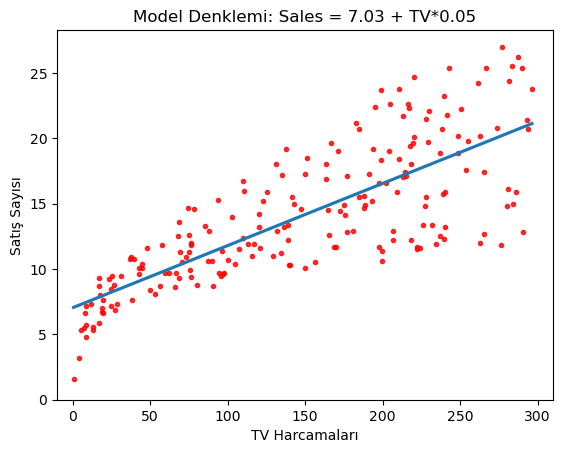

In [273]:
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10, 310)
plt.ylim(bottom=0)

In [275]:
# makine öğrenmesini kapsayan kütüphanedir
from sklearn.linear_model import LinearRegression
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression() # örneklem 
model = reg.fit(X, y)
model.intercept_ # summary( ) yerine
model.coef_ #b1 katsayı

array([0.04753664])

In [276]:
model.score(X,y) # r kare değer başari değeri değil


0.611875050850071

In [277]:
model.predict(X)[0:10] # tahmin değerleri

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

 # TAHMİN
 Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?
 

In [278]:
7.03+30*0.04

8.23

In [279]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression() # örneklem 
model = reg.fit(X, y)

In [280]:
model.predict([[30]]) # tahmin değeri böyle yazılır

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [281]:
yeni_veri=[[5],[8],[900]] # yani 5,8,900 tv harcamalarında tahmini satış değerini veriyor predict

In [282]:
model.predict(yeni_veri)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675,  7.41288667, 49.81556994])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [283]:
from sklearn.metrics import mean_squared_error, r2_score
lm = smf.ols("sales ~ TV", df)
model = lm.fit()



In [284]:
mse=mean_squared_error(y,model.fittedvalues) # tahmin edilen derğer ile gerçek değer arasındaki farkların ort 
# hata kareleri ort değer =birim başına ort hata 

In [285]:
mse

10.512652915656753

In [286]:
import numpy as np

In [287]:
rmse=np.sqrt(mse) # kare alma

In [288]:
rmse

3.2423221486546883

In [289]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [290]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [291]:
k_t=pd.DataFrame({"gercek_y":y[0:10],
                 "tahmin_y":reg.predict(X)[0:10]})

In [292]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t


,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [293]:
k_t["hata_kare"] = k_t["hata"]**2

In [294]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [295]:
np.sum(k_t["hata_kare"]) # toplam hata

92.90350329638105

In [296]:
np.mean(k_t["hata_kare"]) # ort hata

9.290350329638105

In [297]:
np.sqrt(np.mean(k_t["hata_kare"])) # hata kareler ortması

3.048007599996776

In [298]:
### hata değeri sunulması yukardaki gibi değil
model.resid[0:10] # artıklar

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

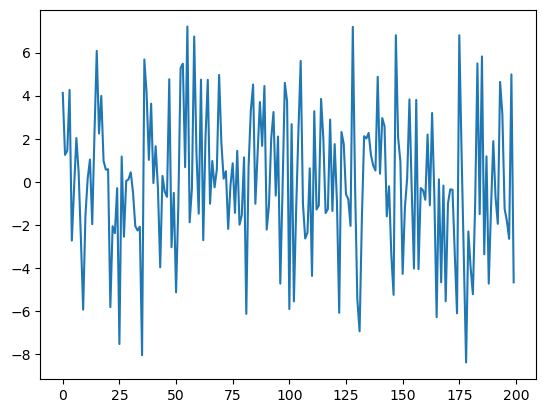

In [299]:
plt.plot(model.resid)

In [ ]:
# ÇOKLU DOĞRUSAL REGRESYON : TEMEL AMAÇ,BAĞIMLI VE BAĞIMSIZ DEĞİŞKENLERRR ARASINDAKİ İLİŞKİYİ İFADE EDER
# VARSAYIMLARR:
    # HATALAR NORMAL DAĞILIR
    # HATALAR BİRBİRİNDE BAĞIMSIZDIR VE ARALARINDA OTOKOLERASYON YOKTUR
    # HER BİR GÖZLEM İÇİN HATA TERİMLERİ VARYANSLARI SABİTTİR
    # DEĞİŞKENLER İLE HATA TERİMİ ARASINDA İLİŞKİ YOKTUR
    # BĞIMSZ DEĞİŞKENLER ARASINDA ÇOKLU DOĞRUSAL BİR PROBLEM YOKTUR
# ÇOKDA VARSAYIMLAR TAKINILMAZ SADECE TEORİDE VARSAYIMLARA BAKILIR

# REGRESYON MODELLERİNİN AVANTAJLARI VE DEZAVANTAJLARI
    # İYİ ANLAŞIŞIRSA DİĞER TÜM ML VE DL KONULARI ÇOK RAHAT KAVRANIR
    # ML =LOJİSTİK REG,DL=DOĞRUSAL REG
    # DOĞRUSALLIK NEDENSELLİK YORUMLAR YAPILMASINI SAĞLAR
    # BU DURUM AKSİYONER VE STRATEJİK MODELLEME İMKANI VERİR
    # DEĞİŞKENLERİN ETKİ DÜZEYLERİ VE ANLAMLILIKLARI DEĞERLENDRİRİLİR
    # BAĞIMLI DEĞİŞKENDEKİ DEĞŞKENLİĞİN AÇIKLANMA BAŞARISI ÖLÇÜLEBİLİR
    # MODEL ANLAMLILIĞI DEĞERLENDİRİLİR
    # AYKIRI GÖZLEMLERE DUYARLIDIR

In [ ]:
 # ÇOKU DOĞRUSAL REGRESYON MODEL ETME
    

In [303]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# TEST VE TRAİN BELİRLEME
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [305]:
X = df.drop("sales", axis = 1) # bağımsız değişkeni ayırdık
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [306]:
X_train.shape

(160, 3)

In [307]:
y_train.shape

(160,)

In [308]:
X_test.shape

(40, 3)

In [309]:
y_test.shape # gözlem değeri

(40,)

In [310]:
training=df.copy()

In [311]:

# Statsmodels
# bu yöntemi cok kullanmıcaz

In [312]:
lm=sm.OLS(y_train,X_train)

In [313]:
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):                   1.28e-137
Time:                        12:50:10   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


In [315]:
model.summary().tables[2]

Omnibus:,11.405,Durbin-Watson:,1.895
Prob(Omnibus):,0.003,Jarque-Bera (JB):,15.574
Skew:,-0.432,Prob(JB):,0.000415
Kurtosis:,4.261,Cond. No.,13.5


In [316]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared (uncentered):,0.982
Model:,OLS,Adj. R-squared (uncentered):,0.982
Method:,Least Squares,F-statistic:,2935.
Date:,"Sun, 03 Mar 2024",Prob (F-statistic):,1.28e-137
Time:,12:50:15,Log-Likelihood:,-336.65
No. Observations:,160,AIC:,679.3
Df Residuals:,157,BIC:,688.5
Df Model:,3,,
Covariance Type:,nonrobust,,


In [317]:
# scikit-learn model

In [318]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [324]:
model.intercept_
# yularda model oluşturudlu

2.979067338122631

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?



In [325]:
yeni_veri=[[30],[10],[40]] # burada modeli test ediyiorz tahmin yapma işlemi yapıyoruz

In [326]:
yeni_veri=pd.DataFrame(yeni_veri).T

In [327]:
 model.predict(yeni_veri) # satışın artışdaki beklenen değeri

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [328]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))# eğitim setindeki hatamız

In [329]:
rmse

1.6447277656443375

###  test hatası

In [330]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))# test seti hatası

In [331]:
rmse # tahmin başarımız bu bizim

1.7815996615334495

In [332]:
# model doğrulam model tuning

In [333]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=55) 
lm = LinearRegression() 
model = lm.fit(X_train, y_train)


In [334]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.7037602738727398

In [335]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.5727286962790004

In [336]:
model.score(X_train, y_train)

0.8946672493883487

In [337]:
# 5 katlı cros valide işlemi

In [338]:
cross_val_score(model, X_train, y_train, cv = 5, scoring = "r2").mean() # modelin doğrulanmıs r kare değeri


0.8818519006969673

In [339]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 5, 
                scoring = "neg_mean_squared_error")) # 5 adet eğitim hatası rmse değeri

array([1.6702816 , 1.54323815, 2.63684394, 1.48541831, 1.53358841])

In [340]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 5, 
                scoring = "neg_mean_squared_error")).mean() # gerçek eğitim hatası değeri

1.7738740832130362

In [341]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 5, 
                scoring = "neg_mean_squared_error")).mean() # gerçek test hatası normal işişnde bunu kullanacaksın  valide edilmiş  değerleri kullancan

1.596820332661934

In [ ]:
# PCR-TEMEL BİLEŞEN REGRESYONU : Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır

In [ ]:
# çoklu doğrusal bağlantı problemi içi kulllanılır , yanlılığa sebebiyet veriri biz bunu olmasını istemeyiz

# bazen değişken sayısının gözlem sayısından fazla olması durumunda kullanılır= çok boyutluluk (değişkenlik) laneti olarak tanınılır

In [ ]:
# bir boyut indirgemesi yaklaşımıdr pce temel bileşen analizi çıkarımı denir bu çıkan modele uygulanan modele pcr temel bileşen retgrsyond deni

In [342]:
# PCR MODEL KULLANMA
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [344]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [345]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [346]:
y = df["Salary"]

In [347]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [348]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [349]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [351]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()
# indirgenmiş bir veri seti var elimizde

In [352]:
X_reduced_train = pca.fit_transform(scale(X_train))


In [353]:
X_reduced_train[0:1,:] # değişkrn sayısı kadar bileşen oluştu 

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [379]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:8]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86])

In [ ]:
# yukarıda çok eğişkeni az sayıda değişkene indirdik 7 taneye ve %92 oranında kara verilebilr bir tutara indirdik

In [356]:
lm = LinearRegression()

In [357]:
pcr_model = lm.fit(X_reduced_train, y_train) #boyutu indşrgenmişdeğişkenlerin train seti ile orj veri train setinialdık 

In [358]:
pcr_model.intercept_ 

543.4834416243655

In [359]:
pcr_model.coef_ # kat sayı değeri

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [360]:
# PCR tahmin
y_pred = pcr_model.predict(X_reduced_train)

In [361]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [362]:
# hata hesaplama
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [363]:
df["Salary"].mean()

535.9258821292775

In [364]:
r2_score(y_train, y_pred)

0.577007525041018

In [365]:
pca2 = PCA()

In [366]:
X_reduced_test = pca2.fit_transform(scale(X_test)) # reduced =indirgenmiş

In [378]:
np.sqrt(mean_squared_error(y_test, y_pred))

390.79142556822234

In [380]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [381]:
from sklearn import model_selection

In [382]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [383]:
lm = LinearRegression()
RMSE = []

In [384]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

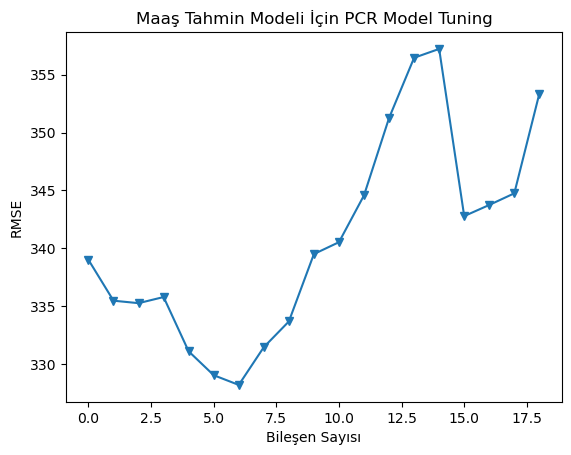

In [385]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');
# optimum değişken sayısını buluyoruz burda min hata 6 . bileşnde sağlanıyor

In [392]:
lm = LinearRegression()

In [393]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [394]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [395]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [396]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [397]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.11987000962233


In [ ]:
# PLS KISMİ EN KÜÇÜK KARELER REGRESYONU : DEĞİŞKENLERİN DAHA AZ SAYIDA VE ARALARINDA ÇOKLU DOĞ. BAĞLANTI PROBLEMİ OLMAYAN BİLEŞENLERE İNDİREGENİP REGRESYON MODELİ KURULMASINA DAYANIR

In [ ]:
 #OPTİMUM BİLEŞEN SAYISINI BELİRLEMEK İÇİ CROS VALİDE CV KULLANILIR

In [398]:
import pandas as pd
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [399]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [400]:
pls_model = PLSRegression().fit(X_train, y_train)

In [401]:
pls_model.coef_ # modelleme

array([[ 35.32916493,  48.83425857,  18.50240933,  39.28117603,
         30.59952998,  40.03398345,  16.85990516,  28.22289896,
         32.73784993,  22.00875744,  33.60903032,  30.39402522,
         25.73279799,  54.98835148,   6.56590871,  -0.90894359,
         17.60903423, -37.24246339,  14.69680385]])

In [402]:
# tahmin
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [403]:
y_pred=pls_model.predict(X_train)

In [405]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [406]:
r2_score(y_train, y_pred)

0.5140424486535481

In [407]:
y_pred=pls_model.predict(X_test)

In [409]:
np.sqrt(mean_squared_error(y_test, y_pred)) # genelde test hatası train hatasından fazla cıkar

398.09956327448526

In [410]:
# model tuning

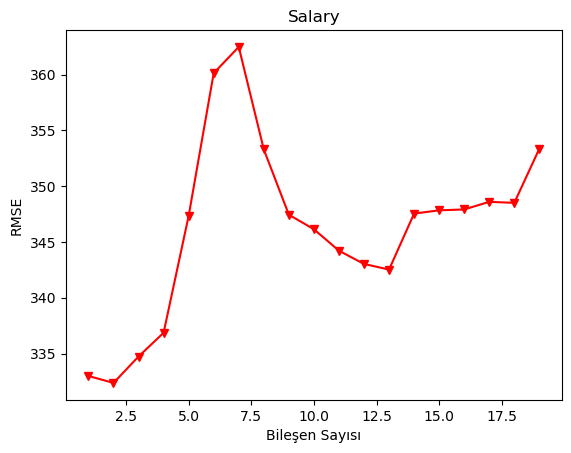

In [411]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
import matplotlib.pyplot as plt


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [412]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)      # final hata testi

In [413]:
y_pred = pls_model.predict(X_test)

In [414]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

In [415]:
# ridge regresyon : amaç hata kareler toplamını minimize eden katsayıları bu katsayıları ceza işlemi yaparak bulmaya çalışacağız

In [417]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [418]:
from sklearn.linear_model import Ridge

In [419]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [420]:
ridge_model

Ridge(alpha=0.1)

In [421]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

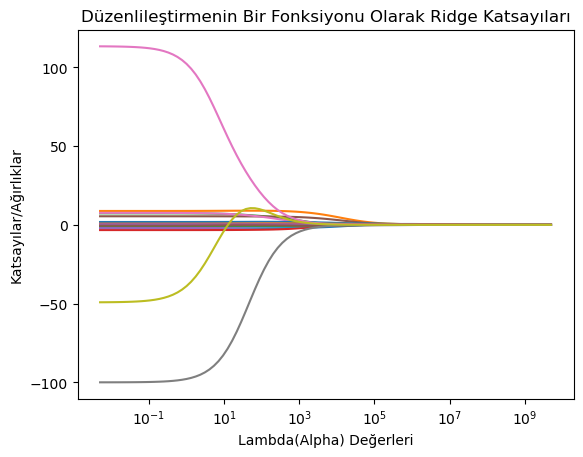

In [422]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

In [196]:
y_pred=ridge_model.predict(X_test)

In [197]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282843

In [198]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [199]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [212]:

from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error")

In [213]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [222]:
ridge_cv.alpha_ # optimum lambda değeri

2018508.6292982749

In [223]:
from sklearn.linear_model import Ridge

ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(X_train, y_train)


In [224]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

387.66724377389795

In [225]:
# LAsso regresyon= ridge regresyon tanımıyla aynı
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [226]:
from sklearn.linear_model import Lasso

In [227]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [228]:
lasso_model

Lasso(alpha=0.1)

In [229]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+03, tolerance: 

Text(0, 0.5, 'weights')

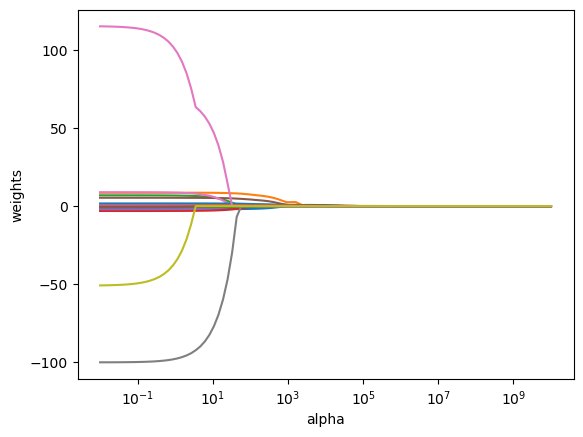

In [230]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [231]:
# tahmin

In [232]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [233]:
y_pred = lasso_model.predict(X_test)

In [234]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.754527014877

In [235]:
# tuning
from sklearn.linear_model import LassoCV

In [237]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         )

In [238]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [239]:
lasso_cv_model.alpha_

563.4670501833853

In [240]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [241]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=563.4670501833853)

In [242]:
y_pred = lasso_tuned.predict(X_test)

In [243]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.59572250697937

In [244]:
# makine oğrenmesinde değerlendirmeyi referans alacağımız yer cv lenmiş yerdir en doğru veriler ordadır


In [245]:
# elastic net regresyon : yine ridge tanımyla aynı sadece l1 l2  yi birleştiriyor